
# **Tarea: simulación y análisis de Paseos Aleatorios Simples**  


Esta tarea tiene como objetivo la implementación y análisis de paseos aleatorios simples en dos escenarios:  
1. **Tiempo discreto:** $t\in\{1,2,\ldots,\}$. 
2. **Tiempo continuo:** $t\in [0,  \infty)$.  

Además, se realizará un **análisis estadístico** del proceso en distintos instantes de tiempo y se utilizará el **método de Montecarlo** para validar las propiedades del proceso.

#### **Parte 1: Paseo Aleatorio Simple en tiempo discreto**  

Un **paseo aleatorio simple** es un proceso estocástico definido por:

$$
S_t = S_{t-1} + X_t, \quad t = 1, 2, 3, \dots
$$

donde:
- $S_t$  representa la posición en el instante  $t$.
- $X_t$  es una variable aleatoria i.i.d. tales que:
  $$
  X_t =
  \begin{cases} 
  +1, & \text{con probabilidad } \frac{1}{2} \\
  -1, & \text{con probabilidad } \frac{1}{2} 
  \end{cases}
  $$

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo discreto.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.


#### **Parte 2: Paseo Aleatorio Simple en tiempo continuo**  

Consideremos ahora la versión del **paseo aleatorio simple en tiempo continuo** donde $X_t \sim N(0,1)$ son variables aleatorias i.i.d. normales estándar.

Se pide:
1. Fijar la semilla de reproducibilidad en 987.
2. Generar 200 realizaciones del paseo aleatorio en tiempo continuo.
3. Representar gráficamente las trayectorias de las 200 simulaciones en la misma figura.


#### **Parte 3: Cálculo de Media y Varianza en Instantes Específicos**  

Consideremos ahora el **paseo aleatorio simple en tiempo discreto** de la Parte 1. Para analizar la evolución del proceso, se pide:

1. Calcular la **media muestral** y la **varianza muestral** de  $S_t$  en los tiempos: $t = 5$, $t = 15$ y $t = 25$.
2. Comprobar que los resultados son acordes a lo visto en clase.

#### **Parte 4: Simulaciones de Montecarlo para obtener propiedades estadísticas**  

Repetir 5000 veces la simulación de la Parte 1 (es decir, se generarán 200 realizaciones del paseo aleatorio simple discreto en cada repetición). Para cada experimento:

1. Se generarán 200 realizaciones del paseo aleatorio simple discreto.
2. Se calcularán las medias muestrales y varianzas muestrales en $t = 5$, $t = 15$ y $t = 25$.
3. Se almacenarán los valores de media y varianza obtenidos en cada una de las 5000 repeticiones.

Al finalizar, se calcularán:

1. La media de las 5000 medias muestrales para cada $ t $.
2. La media de las 5000 varianzas muestrales para cada $ t $.

##### **Preguntas para reflexionar**
- ¿Hacia qué valores esperas que converjan la media y la varianza muestral?  
- ¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?  
- ¿Cómo podrías verificar la ley de los grandes números en este contexto?



### Parte 1

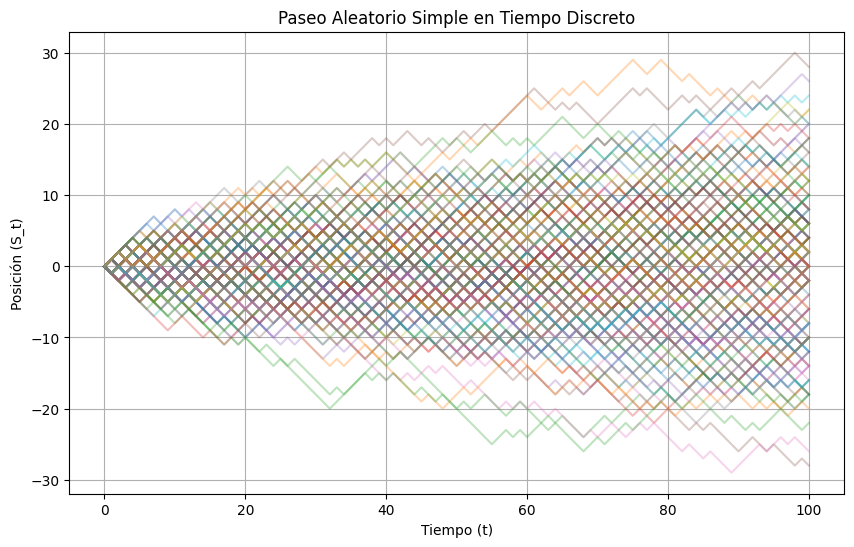

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijar la semilla para reproducibilidad
np.random.seed(987)

# Número de simulaciones y pasos de tiempo
num_simulaciones = 200
num_pasos = 100

S_discreto = np.zeros((num_simulaciones, num_pasos + 1))

# Generar el paseo aleatorio en tiempo discreto
for i in range(num_simulaciones):
    X = np.random.choice([-1, 1], size=num_pasos)  # Variables aleatorias X_t
    S_discreto[i, 1:] = np.cumsum(X)  # Calcular posiciones

# Graficar las trayectorias del paseo aleatorio en tiempo discreto
plt.figure(figsize=(10, 6))
for i in range(num_simulaciones):
    plt.plot(range(num_pasos + 1), S_discreto[i], alpha=0.3)

plt.title("Paseo Aleatorio Simple en Tiempo Discreto")
plt.xlabel("Tiempo (t)")
plt.ylabel("Posición (S_t)")
plt.grid(True)
plt.show()

### Parte 2

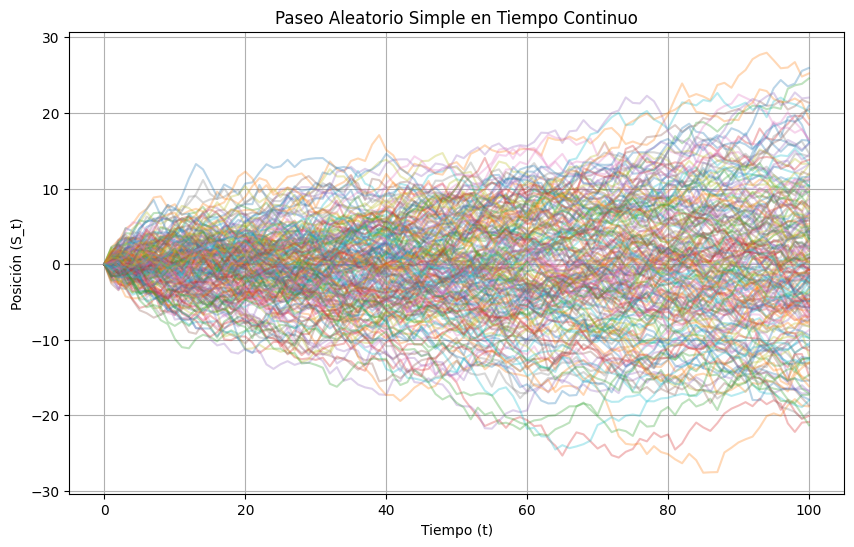

In [3]:
# Fijar la semilla para reproducibilidad
np.random.seed(987)

# Parámetros para el paseo aleatorio en tiempo continuo
num_realizaciones_cont = 200  # Número de trayectorias
num_pasos_cont = 100  # Número de pasos en el paseo aleatorio continuo

# Inicializar matriz de resultados para el paseo aleatorio continuo
S_continuo = np.zeros((num_realizaciones_cont, num_pasos_cont + 1))

# Generar el paseo aleatorio en tiempo continuo
for i in range(num_realizaciones_cont):
    X_continuo = np.random.normal(0, 1, size=num_pasos_cont)  # Variables normales N(0,1)
    S_continuo[i, 1:] = np.cumsum(X_continuo)  # Calcular posiciones

# Graficar las trayectorias del paseo aleatorio en tiempo continuo
plt.figure(figsize=(10, 6))
for i in range(num_realizaciones_cont):
    plt.plot(range(num_pasos_cont + 1), S_continuo[i], alpha=0.3)

plt.title("Paseo Aleatorio Simple en Tiempo Continuo")
plt.xlabel("Tiempo (t)")
plt.ylabel("Posición (S_t)")
plt.grid(True)
plt.show()

### Parte 3

In [5]:
import pandas as pd

# Cálculo de media y varianza en t = 5, 15, 25
t_values = [5, 15, 25]
media_discreto = {t: np.mean(S_discreto[:, t]) for t in t_values}
varianza_discreto = {t: np.var(S_discreto[:, t], ddof=1) for t in t_values}

# Mostrar resultados en tabla
df_resultados = pd.DataFrame({
    "Tiempo (t)": t_values,
    "Media muestral": [media_discreto[t] for t in t_values],
    "Varianza muestral": [varianza_discreto[t] for t in t_values]
})

df_resultados

,Tiempo (t),Media muestral,Varianza muestral
0,5,0.02,4.904121
1,15,-0.10,15.185930
2,25,-0.09,22.665226


### Parte 4

In [ ]:
import numpy as np
import pandas as pd

# Fijar la semilla
np.random.seed(987)

# Parámetros generales
num_realizaciones = 200  # Número de trayectorias
num_pasos = 100  # Número de pasos en el paseo aleatorio
t_values = [5, 15, 25]  # Tiempos de análisis

# Inicializar matriz de resultados para el paseo aleatorio discreto
S_discreto = np.zeros((num_realizaciones, num_pasos + 1))

# Generar el paseo aleatorio en tiempo discreto
for i in range(num_realizaciones):
    X = np.random.choice([-1, 1], size=num_pasos)  # Variables aleatorias X_t
    S_discreto[i, 1:] = np.cumsum(X)  # Calcular posiciones

# Cálculo de media y varianza en t = 5, 15, 25
media_discreto = {t: np.mean(S_discreto[:, t]) for t in t_values}
varianza_discreto = {t: np.var(S_discreto[:, t], ddof=1) for t in t_values}

# Mostrar resultados en tabla
df_resultados = pd.DataFrame({
    "Tiempo (t)": t_values,
    "Media muestral": [media_discreto[t] for t in t_values],
    "Varianza muestral": [varianza_discreto[t] for t in t_values]
})

# Parámetros para Montecarlo
num_experimentos = 5000  # Número de repeticiones

# Inicializar listas para almacenar medias y varianzas 
medias_mc = {t: [] for t in t_values}
varianzas_mc = {t: [] for t in t_values}

# Simulación de Montecarlo
for _ in range(num_experimentos):
    # Generar el paseo aleatorio en tiempo discreto para esta repetición
    S_mc = np.zeros((num_realizaciones, num_pasos + 1))
    for i in range(num_realizaciones):
        X_mc = np.random.choice([-1, 1], size=num_pasos)  # Variables aleatorias X_t
        S_mc[i, 1:] = np.cumsum(X_mc)  # Calcular posiciones

    # Calcular medias y varianzas para cada t
    for t in t_values:
        medias_mc[t].append(np.mean(S_mc[:, t]))
        varianzas_mc[t].append(np.var(S_mc[:, t], ddof=1))

# Calcular la media de las 5000 medias y varianzas muestrales para cada t
media_final = {t: np.mean(medias_mc[t]) for t in t_values}
varianza_final = {t: np.mean(varianzas_mc[t]) for t in t_values}

# Mostrar resultados de Montecarlo en tabla
df_montecarlo = pd.DataFrame({
    "Tiempo (t)": t_values,
    "Media de medias muestrales": [media_final[t] for t in t_values],
    "Media de varianzas muestrales": [varianza_final[t] for t in t_values]
})

df_montecarlo

,Tiempo (t),Media de medias muestrales,Media de varianzas muestrales
0,5,-0.000048,4.994342
1,15,-0.000320,14.971557
2,25,0.000216,24.974300


##### **Preguntas para reflexionar**
- ¿Hacia qué valores esperas que converjan la media y la varianza muestral?  
- ¿Cómo se relacionan estos valores con las propiedades teóricas del paseo aleatorio?  
- ¿Cómo podrías verificar la ley de los grandes números en este contexto?


1) Se espera que la media muestral converja a 0 y la varianza muestral a t. Suponemos esto debido a que la media de X es 0 y la varianza de X es 1. Por lo tanto, la media de S_t es 0 y la varianza de S_t es t.

2) La media esperada del proceso es 0 y la varianza crece linealmente con el tiempo.  
Los resultados obtenidos en la simulación validan estas propiedades teóricas.

3) Al aumentar el número de simulaciones, la media muestral debe acercarse a 0 y la varianza muestral a t.  
Esto se puede comprobar repitiendo más experimentos y observando la estabilización de los valores.